In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else(x)) #to convert string to list


Text(0, 0.5, '')

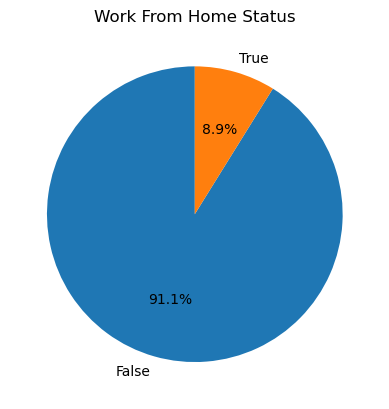

In [3]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle= 90,autopct='%1.1f%%')
plt.title('Work From Home Status')
plt.ylabel('')


In [4]:
df[['job_work_from_home','job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


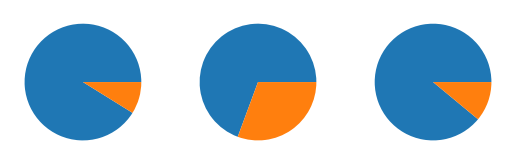

In [5]:
fig, ax = plt.subplots(1,3)

ax[0].pie(df['job_work_from_home'].value_counts())
ax[1].pie(df['job_no_degree_mention'].value_counts())
ax[2].pie(df['job_health_insurance'].value_counts())



plt.show()


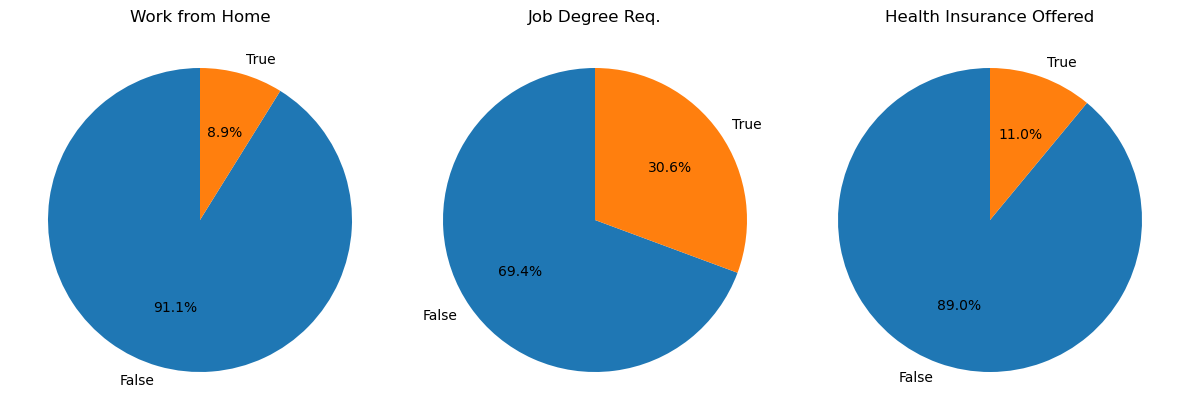

In [ ]:
#We want to plot above plots in less line of code because above one needs to cleaned and plot individually.
#  so insted we will creat for loop then use
# sub plot to plot the results. first use the std fig,ax = plt.subplots() here, we need 1 row and three columns to plot our values.
# #we will create the dictionary in which the keys will be the name of the coulumn form the df we want to plot and 
# key's values will the title of the
# charts.  
# for the For loop we will use following variables, i to get index, column to get the count from the df, title to get the title for our plots
#we use enumerate inside the () we will use the dict we created and most imp we used .items() this will let us to go through the key and value so 
#we can plot get the right info and plot. Also you can see we wrote (column, title) in () bcz .items() will return the tuple of the key-value pair.
#so to access we need to have our variable in () or it will give error.

fig,ax = plt.subplots(1,3)
fig.set_size_inches((12, 5))  # to make the graph big so it gets the number in their portion

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance':'Health Insurance Offered'
}
for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90, autopct= '%1.1f%%',labels=['False','True'])
     #df[column] part will check df column 'job_work_form home
     #then do values count and will plot. 
     #we use lable to display ture of false values make sure
     #false is first and true is second or it will display wrong info.
    #startangle at 90 so we can start out pie form the top.
                                                                                                    
    ax[i].set_title(title)
    
plt.tight_layout()
plt.show()


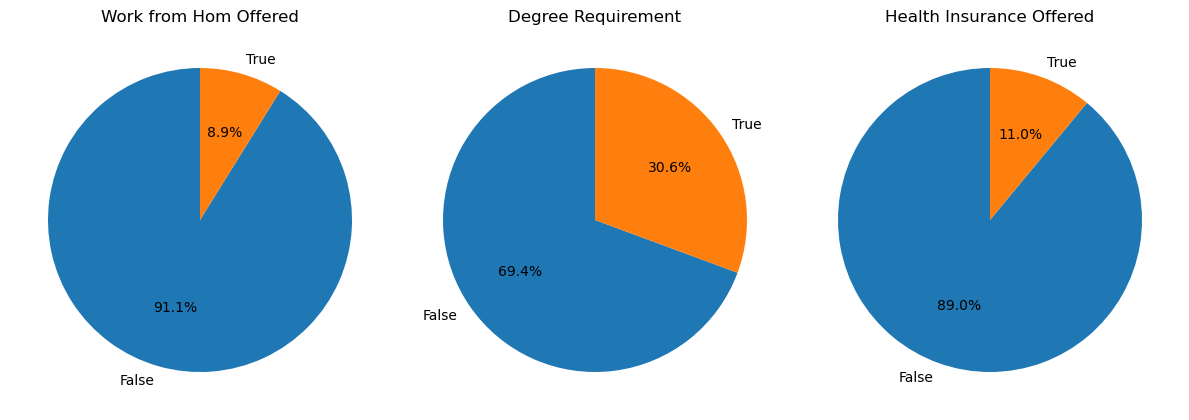

In [8]:
#with out for loop

# Set up the matplotlib figure
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

# Data Analyst Salaries
plt.subplot(1, 3, 1)
plt.pie(df['job_work_from_home'].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Work from Hom Offered')

# Job No Degree
plt.subplot(1, 3, 2)
plt.pie(df['job_no_degree_mention'].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Degree Requirement')

# Job Health Insurance
plt.subplot(1, 3, 3)
plt.pie(df['job_health_insurance'].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Health Insurance Offered')

plt.tight_layout()
plt.show()


In [9]:
#what we learned
#how to plot pic charts in both pandas and matplotlib's way
#we learn about subplots
#some of key points: autopct - A string or function used to label the wedges with their numeric value. The label will be placed inside the wedge.
#startangle - Rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
#'%1.1f%%' means we want to show min one number before descimal and .1 means we just one descimal after the number. f means its flot type num, %% means the
#nember will have % sign with it


#we learned for loop for dict. We learn .item() for dict to get key value pair. It is always retuns the tuple so we care ful while building for loop 
#you gave () and two variable for one for to access key and the other is for value. we use enumarate to get index so we use it for ploting. 

#plt.tight_latout() to remove over lapping
#plt.title() to set the title for the plot
#plt.subplot(1, 3, 1) means your plot will be in first row first cell. (1,3) it is the matrix and 1 is the place your plot will be in that matrix. you 
#know matlab it is easier to recall. just remember matlab's funda.


#pie is good for less values or for two values. if you have multiple columns to plot it will become clutter so at that time use different plots.

